In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Команда для отображения графиков в ноутбуке
%matplotlib inline

In [16]:
df = pd.read_csv('S02-hw-dataset.csv')

# Вывод первых строк
print("\nПервые 5 строк")
display(df.head())

# Информация о типах данных
print("\nИнформация о датасете")
df.info()

# Базовые статистики
print("\nОписательные статистики ")
display(df.describe())


Первые 5 строк


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



Информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Описательные статистики 


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [3]:
# 1 Доля пропусков
print("Доля пропусков в столбцах")
print(df.isna().mean())

# 2 Поиск полных дубликатов
duplicates_count = df.duplicated().sum()
print(f"\nКоличество полных дубликатов строк: {duplicates_count}")

# Вывод дубликатов для просмотра
if duplicates_count > 0:
    print("Строки-дубликаты:")
    display(df[df.duplicated(keep=False)])

# 3 Поиск подозрительных значений
print("\nПодозрительные значения")

# 3,1 Отрицательные покупки (purchases < 0)
suspicious_purchases = df[df['purchases'] < 0]
if not suspicious_purchases.empty:
    print(f"Найдены записи с отрицательным количеством покупок ({len(suspicious_purchases)}):")
    display(suspicious_purchases)

# 3,2 Нереалистичный возраст
# Учитываем, что age может быть NaN, поэтому фильтруем только заполненные
suspicious_age = df[(df['age'] > 100) | (df['age'] < 10)]
if not suspicious_age.empty:
    print(f"Найдены записи с подозрительным возрастом ({len(suspicious_age)}):")
    display(suspicious_age)

# 3,3 Логические противоречия: Покупки есть, а выручка 0
suspicious_revenue = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
if not suspicious_revenue.empty:
    print(f"Найдены записи с покупками, но нулевой выручкой ({len(suspicious_revenue)}):")
    display(suspicious_revenue)

Доля пропусков в столбцах
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Количество полных дубликатов строк: 1
Строки-дубликаты:


,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511



Подозрительные значения
Найдены записи с отрицательным количеством покупок (1):


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Найдены записи с подозрительным возрастом (2):


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


Найдены записи с покупками, но нулевой выручкой (1):


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


В результате анализа на недостоверности было выброшено примерно 4 ячейки, что не много, но учитывая длинную датасета составляет около 10% все сета. Однако эти проблемные строки легко обнаружить.
Самыми значимыми выбросами являются недостоверный возраст и покупки.

In [5]:
print("Распределение пользователей по странам")
country_counts = df['country'].value_counts()
display(country_counts)

print("\nСредние показатели (покупки и выручка) по странам")
country_stats = df.groupby('country')[['purchases', 'revenue']].mean().sort_values(by='revenue', ascending=False)
display(country_stats)

print("\nСуммарная выручка по странам")
total_revenue_by_country = df.groupby('country')['revenue'].sum().sort_values(ascending=False)
display(total_revenue_by_country)

Распределение пользователей по странам


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


Средние показатели (покупки и выручка) по странам


,purchases,revenue
country,,
DE,6.500000,1445.500000
CN,4.500000,1054.000000
RU,4.769231,790.076923
FR,4.250000,675.916667
US,4.625000,557.375000



Суммарная выручка по странам


country
RU    10271
DE     8673
FR     8111
US     4459
CN     2108
Name: revenue, dtype: int64

Больше всего пользователей из России (RU) и Франции (FR).
Лидером по средней выручке на пользователя является Германия (DE), несмотря на меньшее количество пользователей по сравнению с RU. Пользователи из DE в среднем совершают больше покупок.

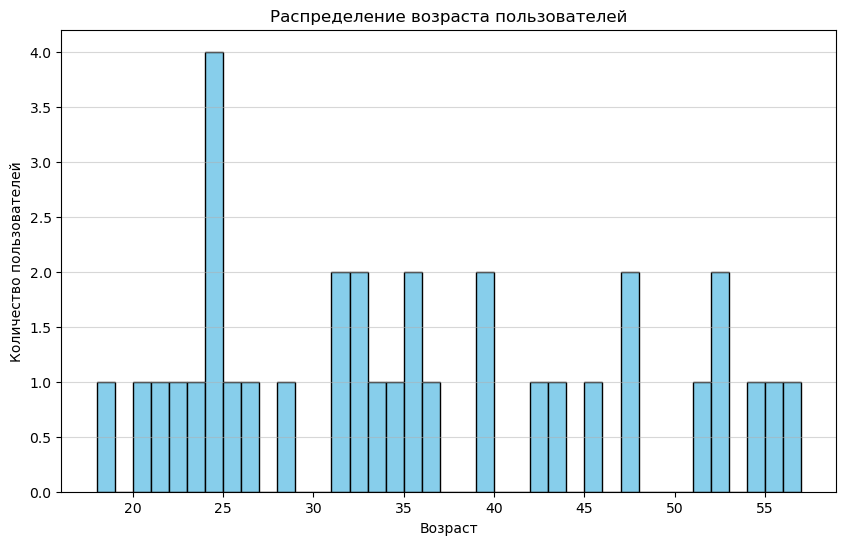

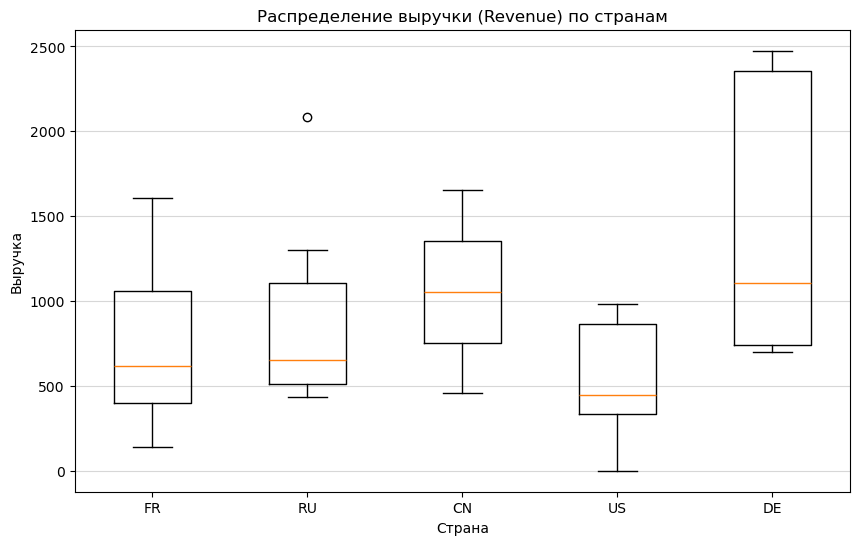

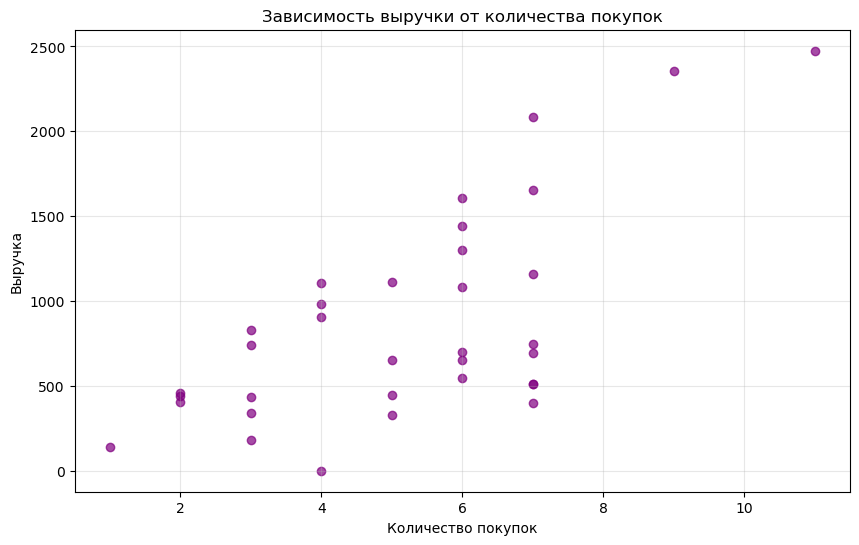

In [67]:
plt.rcParams['figure.figsize'] = (10, 6)

plt.figure()
# Удаляем NaN перед построением гистограммы и выбросы
df = pd.read_csv('S02-hw-dataset.csv')
df = df[((df['age'] < 100) & (df['age'] > 10) & (df['purchases'] > 0))].dropna()
plt.hist(df['age'], bins=39, color='skyblue', edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.5)

# Сохранение графика 1
plt.savefig('figures/Hist.png')

plt.show()




# Boxplot для выручки по странам
countries = df['country'].unique()
data_to_plot = [df[df['country'] == c]['revenue'] for c in countries]

plt.figure()
plt.boxplot(data_to_plot, tick_labels=countries)
plt.title('Распределение выручки (Revenue) по странам')
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.grid(axis='y', alpha=0.5)

# Сохранение графика 1
plt.savefig('figures/(Revenue).png')

plt.show()

# Scatter plot: Покупки vs Выручка
plt.figure()
plt.scatter(df['purchases'], df['revenue'], color='purple', alpha=0.7)
plt.title('Зависимость выручки от количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.grid(True, alpha=0.3)

# Сохранение графика 3
plt.savefig('figures/scatter_purchases_revenue.png')

plt.show()

Гистограмма возраста: Основная масса пользователей находится в диапазоне 23–53 лет. Больше всего в 24

Boxplot: Показывает разброс выручки внутри стран. Германия (DE) демонстрирует высокий медианный уровень и значительный разброс в верхнюю сторону.

Scatter plot: Наблюдается линейная зависимость: чем больше покупок, тем выше выручка.